[   2    4    5 ... 6298 6300 6303]


/home/mik/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[   0    1    3 ... 6299 6301 6302]


/home/mik/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


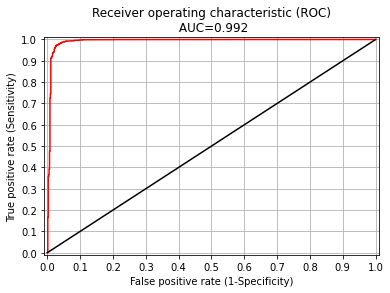

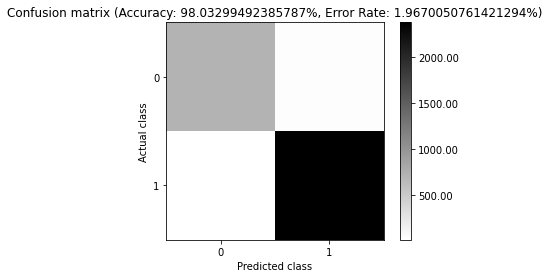

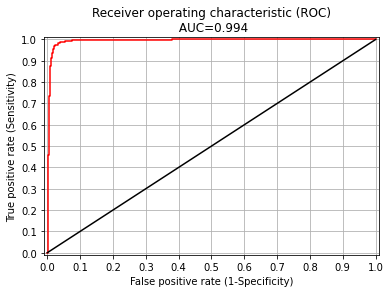

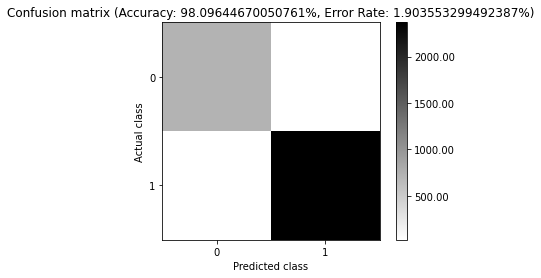

Ran Exercise 9.1.1


In [3]:
# exercise 9.1.1

from matplotlib.pyplot import figure, show
#import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from toolbox_02450 import rocplot, confmatplot

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine2.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# K-fold crossvalidation with stratified folds
K = 2
CV = StratifiedKFold(K, shuffle=True)

k=0
for train_index, test_index in CV.split(X,y):
    print(train_index)
    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]

    logit_classifier = LogisticRegression()
    logit_classifier.fit(X_train, y_train)

    y_test_est = logit_classifier.predict(X_test).T
    p = logit_classifier.predict_proba(X_test)[:,1].T

    figure(k)
    rocplot(p, y_test)

    figure(k+1)
    confmatplot(y_test,y_test_est)

    k+=2
    
show()    

print('Ran Exercise 9.1.1')

[   1    2    3 ... 6289 6291 6303]
[   0    8   14 ... 6300 6301 6302]


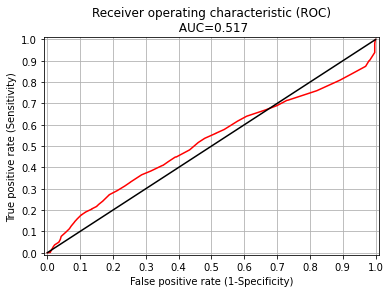

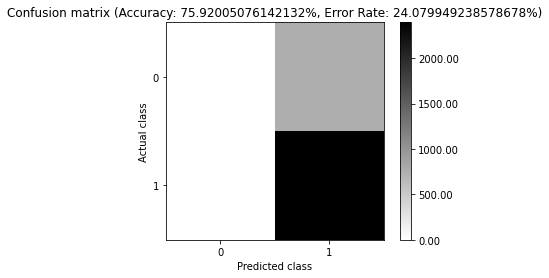

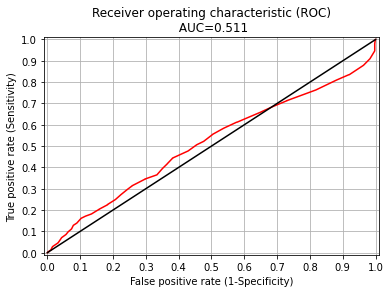

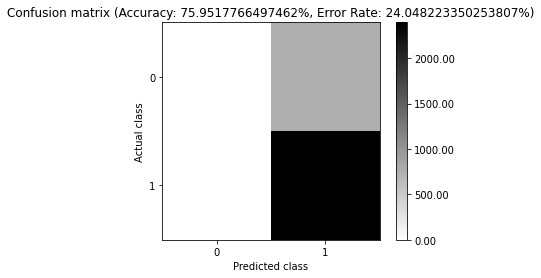

In [4]:
# exercise 9.1.2

from matplotlib.pyplot import figure, show
#import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from toolbox_02450 import rocplot, confmatplot

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine2.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]

attribute_included = 10   # alcohol contents
X = X[:,attribute_included].reshape(-1,1)
attributeNames = attributeNames[attribute_included]
N, M = X.shape
C = len(classNames)

# K-fold crossvalidation
K = 2
CV = StratifiedKFold(K, shuffle=True)

k=0
for train_index, test_index in CV.split(X,y):
    print(train_index)
    # extract training and test set for current CV fold
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]

    logit_classifier = LogisticRegression()
    logit_classifier.fit(X_train, y_train)

    y_test_est = logit_classifier.predict(X_test).T
    p = logit_classifier.predict_proba(X_test)[:,1].T

    figure(k)
    rocplot(p,y_test)

    figure(k+1)
    confmatplot(y_test,y_test_est)

    k+=2
    
show()    

Error rate: 18.00%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.80%
Error rate: 17.40%
Error rate: 17.80%
Error rate: 17.40%
Error rate: 17.80%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 18.00%
Error rate: 17.80%
Error rate: 17.80%
Error rate: 17.80%
Error rate: 18.00%
Error rate: 17.20%
Error rate: 17.20%
Error rate: 17.80%
Error rate: 18.20%
Error rate: 17.60%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 18.00%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.80%
Error rate: 17.40%
Error rate: 17.40%
Error rate: 17.40%
Error rate: 17.40%
Error rate: 18.40%
Error rate: 17.40%
Error rate: 18.00%
Error rate: 17.40%
Error rate: 17.60%
Error rate: 17.60%
Error rate: 18.00%
Error rate: 17.80%
Error rate: 18.00%
Error rate: 17.60%
Error rate: 18.20%
Error rate: 17.80%
Error rate: 17.40%
Error rate: 17.80%
Error rate: 

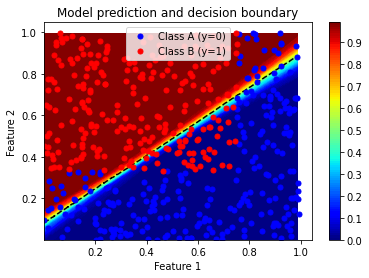

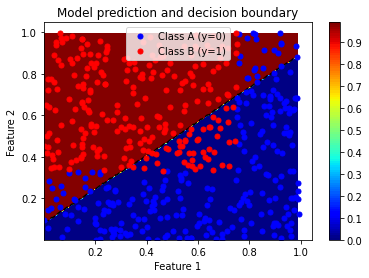

Ran Exercise 9.2.1


In [5]:
# exercise 9.2.1


from matplotlib.pyplot import figure, show
import numpy as np
from scipy.io import loadmat
from toolbox_02450 import dbplot, dbprobplot, bootstrap
from toolbox_02450.bin_classifier_ensemble import BinClassifierEnsemble
from sklearn.linear_model import LogisticRegression

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/synth5.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Fit model using bootstrap aggregation (bagging):

# Number of rounds of bagging
L = 100

# Weights for selecting samples in each bootstrap
weights = np.ones((N,1),dtype=float)/N

# Storage of trained log.reg. classifiers fitted in each bootstrap
logits = [0]*L
votes = np.zeros((N,))

# For each round of bagging
for l in range(L):

    # Extract training set by random sampling with replacement from X and y
    X_train, y_train = bootstrap(X, y, N, weights)
    
    # Fit logistic regression model to training data and save result
    logit_classifier = LogisticRegression()
    logit_classifier.fit(X_train, y_train)
    logits[l] = logit_classifier
    y_est = logit_classifier.predict(X).T
    votes = votes + y_est

    ErrorRate = (y!=y_est).sum(dtype=float)/N
    print('Error rate: {:2.2f}%'.format(ErrorRate*100))    
    
# Estimated value of class labels (using 0.5 as threshold) by majority voting
y_est_ensemble = votes>(L/2)

# Compute error rate
ErrorRate = (y!=y_est_ensemble).sum(dtype=float)/N
print('Error rate: {:3.2f}%'.format(ErrorRate*100))

ce = BinClassifierEnsemble(logits)
figure(1); dbprobplot(ce, X, y, 'auto', resolution=200)
figure(2); dbplot(ce, X, y, 'auto', resolution=200)

show()

print('Ran Exercise 9.2.1')

Error rate: 17.80%
Error rate: 41.39%
Error rate: 46.14%
Error rate: 51.56%
Error rate: 54.67%
Error rate: 49.54%
Error rate: 47.86%
Error rate: 50.25%
Error rate: 48.92%
Error rate: 46.97%
Error rate: 49.43%
Error rate: 56.78%
Error rate: 48.96%
Error rate: 44.49%
Error rate: 46.47%
Error rate: 51.18%
Error rate: 43.87%
Error rate: 48.15%
Error rate: 45.10%
Error rate: 51.26%
Error rate: 38.47%
Error rate: 39.07%
Error rate: 46.45%
Error rate: 45.52%
Error rate: 39.40%
Error rate: 25.61%
Error rate: 49.09%
Error rate: 52.74%
Error rate: 50.62%
Error rate: 54.11%
Error rate: 44.48%
Error rate: 46.33%
Error rate: 52.58%
Error rate: 51.16%
Error rate: 48.38%
Error rate: 51.56%
Error rate: 51.01%
Error rate: 47.22%
Error rate: 45.42%
Error rate: 55.32%
Error rate: 45.24%
Error rate: 37.25%
Error rate: 40.63%
Error rate: 37.47%
Error rate: 51.16%
Error rate: 43.69%
Error rate: 52.04%
Error rate: 54.98%
Error rate: 43.04%
Error rate: 46.38%
Error rate: 66.34%
Error rate: 45.51%
Error rate: 

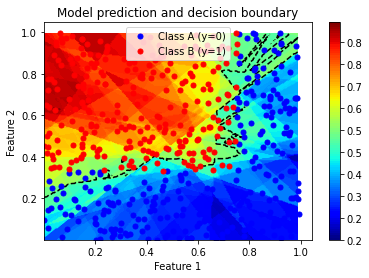

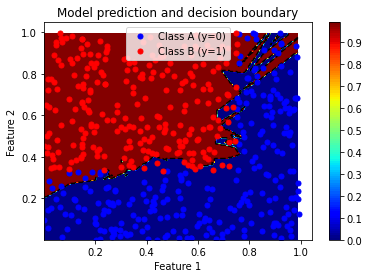

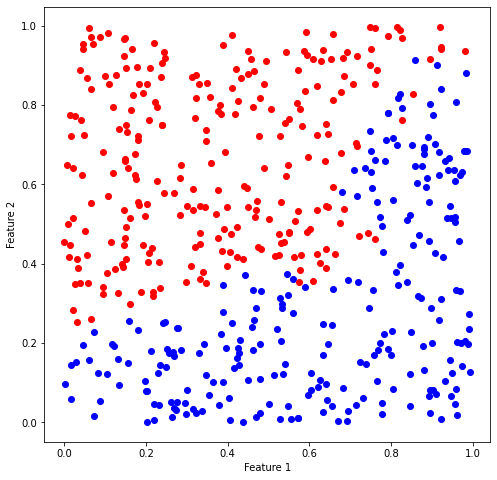

Ran Exercise 9.2.2


In [6]:
# exercise 9.2.2


import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from toolbox_02450 import dbplot, dbprobplot, bootstrap
from toolbox_02450.bin_classifier_ensemble import BinClassifierEnsemble
from sklearn.linear_model import LogisticRegression

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/synth5.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Fit model using bootstrap aggregation (boosting, AdaBoost):

# Number of rounds of bagging
L = 100

# Weights for selecting samples in each bootstrap
weights = np.ones((N,),dtype=float)/N

# Storage of trained log.reg. classifiers fitted in each bootstrap
logits = [0]*L
alpha = np.ones( (L,) )
votes = np.zeros((N,1))
epsi = 0
y_all = np.zeros((N,L))
y = y > 0.5
# For each round of bagging
for l in range(L):
    
    # Extract training set by random sampling with replacement from X and y
    while True : 
        # not a thing of beauty, however log.reg. fails if presented with less than two classes. 
        X_train, y_train = bootstrap(X, y, N, weights) 
        if not (all(y_train==0) or all(y_train == 1)) : break      
    
    # Fit logistic regression model to training data and save result
    # turn off regularization with C. 
    logit_classifier = LogisticRegression(C=1000)

    logit_classifier.fit(X_train, y_train )
    logits[l] = logit_classifier
    y_est = logit_classifier.predict(X).T > 0.5
    
    y_all[:,l] = 1.0 * y_est
    v  = (y_est != y).T
    ErrorRate = np.multiply(weights,v).sum()
    epsi = ErrorRate
    
    alphai = 0.5 * np.log( (1-epsi)/epsi)
    
    weights[y_est == y] = weights[y_est == y] * np.exp( -alphai )
    weights[y_est != y] = weights[y_est != y] * np.exp(  alphai )
    
    weights = weights / sum(weights)
            
    votes = votes + y_est
    alpha[l] = alphai
    print('Error rate: {:2.2f}%'.format(ErrorRate*100))
    
    
# Estimated value of class labels (using 0.5 as threshold) by majority voting
alpha = alpha/sum(alpha)
y_est_ensemble = y_all @ alpha > 0.5

#y_est_ensemble = votes > (L/2)
#y_est_ensemble = mat(y_all) * mat(alpha) - (1-mat(y_all)) * mat(alpha) > 0
ErrorRateEnsemble = sum(y_est_ensemble != y)/N

# Compute error rate
#ErrorRate = (y!=y_est_ensemble).sum(dtype=float)/N
print('Error rate for ensemble classifier: {:.1f}%'.format(ErrorRateEnsemble*100))
 
ce = BinClassifierEnsemble(logits,alpha)
#ce = BinClassifierEnsemble(logits) # What happens if alpha is not included?
plt.figure(1); dbprobplot(ce, X, y, 'auto', resolution=200)
plt.figure(2); dbplot(ce, X, y, 'auto', resolution=200)
#plt.figure(3); plt.plot(alpha);

#%%
plt.figure(4,figsize=(8,8))
for i in range(2):
    plt.plot(X[ (y_est_ensemble==i),0],X[ (y_est_ensemble==i),1],'br'[i] + 'o')

## Incomment the below lines to investigate miss-classifications
#for i in range(2):
#    plt.plot(X[ (y==i),0],X[ (y==i),1],'br'[i] + '.')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')    
plt.show()

print('Ran Exercise 9.2.2')

Error rate: 0.20%


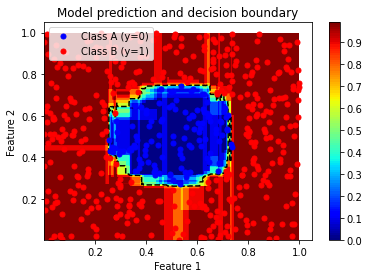

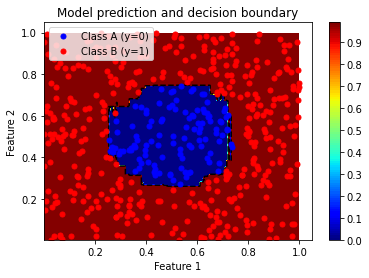

Ran Exercise 9.2.3


In [7]:
# exercise 9.2.3

from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from toolbox_02450 import dbplot, dbprobplot
from sklearn.ensemble import RandomForestClassifier

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/synth7.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)


# Number of rounds of bagging
L = 10

# Fit model using random tree classifier:
rf_classifier = RandomForestClassifier(L)
rf_classifier.fit(X, y)
y_est = rf_classifier.predict(X).T
y_est_prob = rf_classifier.predict_proba(X).T

# Compute classification error
ErrorRate = (y!=y_est).sum(dtype=float)/N
print('Error rate: {:.2f}%'.format(ErrorRate*100))    

# Plot decision boundaries    
figure(1); dbprobplot(rf_classifier, X, y, 'auto', resolution=400)
figure(2); dbplot(rf_classifier, X, y, 'auto', resolution=400)

show()

print('Ran Exercise 9.2.3')